In [161]:
import pandas as pd
import numpy as np

In [162]:
df = pd.read_csv('GermanCredit.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


### Preprocessing

In [163]:
# 1.  Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. 
# (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.) 

In [164]:
def drop_nan(df,n):
    df_copy = df.replace('none', np.nan)
    most_nan = df_copy.isnull().sum().sort_values(ascending=False)[:n]
    print(most_nan)
    drop_cols = list(most_nan.reset_index()['index'])
    df.drop(columns=drop_cols, inplace=True)

In [165]:
drop_nan(df,3)
df

other_parties          907
other_payment_plans    814
own_telephone          596
dtype: int64


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [166]:
# 2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes. 

In [167]:
def drop_apostrophes(df):
    for column in df.columns:
        # Check if the data type of the column is object (string)
        if df[column].dtype == 'O':
            df[column] = df[column].apply(lambda x: x.strip("'"))

In [168]:
drop_apostrophes(df)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [169]:
# 3. The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [170]:
def update_checking(value):
    #print(value, type(value))
    if value == 'no checking':
        return 'No Checking'
    elif value == '<0':
        return 'Low'
    elif value == '0<=X<200':
        return 'Medium'
    else:
        return 'High'

In [171]:
df['checking_status'] = df['checking_status'].apply(update_checking) # apply function will create a new series, doesn't modify original dataframe
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [172]:
# 4. The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High'). 

In [173]:
def update_savings(value):
    #print(value, type(value))
    if value == 'no known savings':
        return 'No Savings'
    elif value == '<100':
        return 'Low'
    elif value == '100<=X<500':
        return 'Medium'
    else:
        return 'High'

In [174]:
df['savings_status'] = df['savings_status'].apply(update_savings) # apply function will create a new series, doesn't modify original dataframe
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [175]:
# 5. Change class column values from 'good' to '1' and 'bad' to '0'.

In [176]:
def update_class(value):
    #print(value, type(value))
    if value == 'good':
        return 1
    else:
        return 0

In [177]:
df['class'] = df['class'].apply(update_class) # apply function will create a new series, doesn't modify original dataframe
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [178]:
# 6. Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [179]:
df['employment'].unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [180]:
def update_employment(value):
    #print(value, type(value))
    if value == 'unemployed':
        return 'Unemployed'
    elif value == '<1':
        return 'Amateur'
    elif value == '1<=X<4':
        return 'Professional'
    elif value == '4<=X<7':
        return 'Experienced'
    else:
        return 'Expert'

In [181]:
df['employment'] = df['employment'].apply(update_employment) # apply function will create a new series, doesn't modify original dataframe
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


### Analysis

In [182]:
# 1a. Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad). 

In [25]:
def revert_class(value):
    #print(value, type(value))
    if value == 1:
        return 'good'
    else:
        return 'bad'

In [26]:
df['class'] = df['class'].apply(revert_class)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [27]:
foreign_worker = pd.crosstab(df['foreign_worker'],df['class'])
foreign_worker

class,bad,good
foreign_worker,,
no,4,33
yes,296,667


In [28]:
# 1b. Similarly, get the count of each category of employment for each category of saving_status.

In [29]:
employment = pd.crosstab(df['employment'],df['savings_status'])
employment

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [30]:
# 2. Find the average credit_amount of single males that have 4<=X<7 years of employment. 
#    You can leave the raw result as is, no need for rounding.

In [133]:
filtered_df = df[(df['personal_status'] == 'male single') & (df['employment'] == 'Experienced')]
avg_credit = filtered_df['credit_amount'].mean()
avg_credit

4142.592592592592

In [34]:
# 3.  Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding. 

In [138]:
job_df = df.groupby('job')['duration'].mean()
job_df

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

In [45]:
# 4. For the purpose 'education', what is the most common checking_status and savings_status?

In [46]:
education_df = df[df['purpose'] == 'education']
common_checking = df['checking_status'].value_counts().idxmax() # idxmax() returns index value of the max value in Series
common_savings = df['savings_status'].value_counts().idxmax()
print(f"Most common checking status: {common_checking}")
print(f"Most common savings status: {common_savings}")

Most common checking status: No Checking
Most common savings status: Low


### Visualization

In [50]:
from matplotlib import pyplot as plt

In [120]:
# 1. Plot subplots of two bar charts: one for savings_status (x-axis) and the other for checking_status (x-axis). 
#    In each chart, the y-axis represents number of people. Moreover, for each category of saving_status (checking_status), 
#    we need you to display four bars, each corresponding to one of the "personal_status" categories. 
#    Each personal status category bar should be of a different color. 

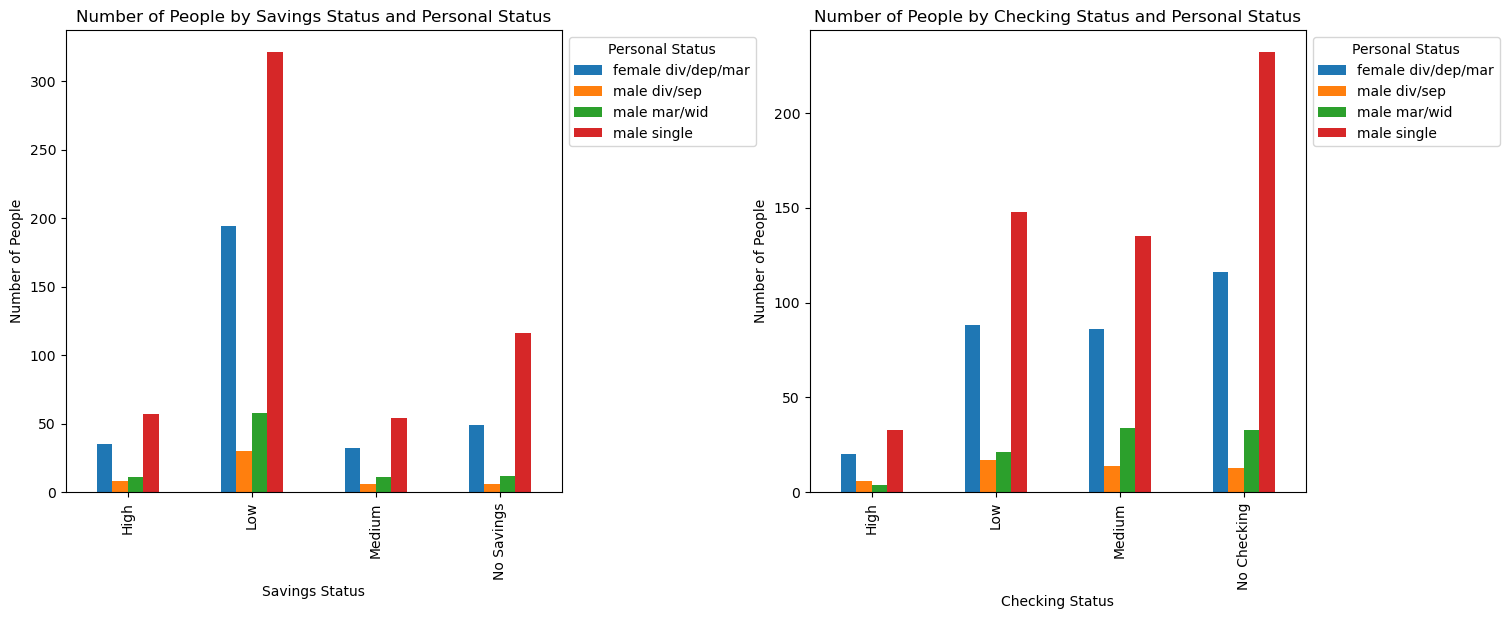

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

savings_counts = df.groupby(['savings_status', 'personal_status']).size().unstack('personal_status', fill_value=0)
savings_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Number of People by Savings Status and Personal Status')
ax1.set_xlabel('Savings Status')
ax1.set_ylabel('Number of People')
ax1.legend(title='Personal Status', loc='upper left', bbox_to_anchor=(1.0, 1.0))

checking_counts = df.groupby(['checking_status', 'personal_status']).size().unstack('personal_status', fill_value=0)
checking_counts.plot(kind='bar', ax=ax2)
ax2.set_title('Number of People by Checking Status and Personal Status')
ax2.set_xlabel('Checking Status')
ax2.set_ylabel('Number of People')
ax2.legend(title='Personal Status', loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.subplots_adjust(wspace=0.5)

plt.show()

In [65]:
# 2. For people having credit_amount more than 4000, plot a bar graph which maps 
#    property_magnitude (x-axis) to the average customer age for that magnitude (y-axis). 

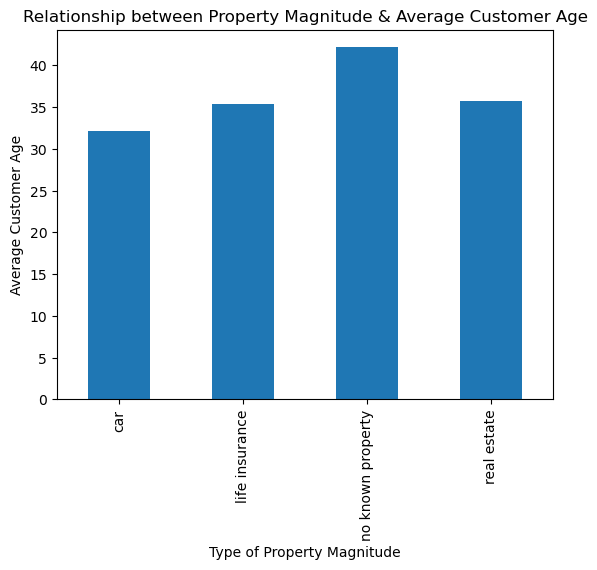

In [118]:
high_credit = df[df['credit_amount'] > 4000]
fig, ax = plt.subplots()
avg_age = high_credit.groupby('property_magnitude')['age'].mean()
avg_age.plot(kind='bar')
ax.set_title('Relationship between Property Magnitude & Average Customer Age')
ax.set_xlabel('Type of Property Magnitude')
ax.set_ylabel('Average Customer Age')
plt.show()

In [84]:
# 3. For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
#    Personal status
#    Credit history
#    Job 

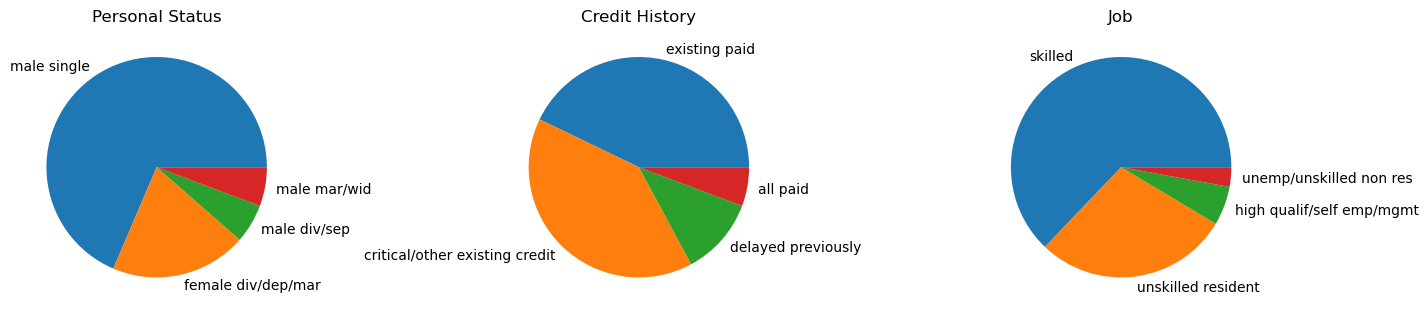

In [131]:
high_savings = df[(df['savings_status'] == 'High') & (df['age'] > 40)]
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16, 6))

personal_status_counts = high_savings['personal_status'].value_counts()
ax1.pie(personal_status_counts, labels=personal_status_counts.index)
ax1.set_title('Personal Status')

credit_history_counts = high_savings['credit_history'].value_counts()
ax2.pie(credit_history_counts, labels=credit_history_counts.index)
ax2.set_title('Credit History')

job_counts = high_savings['job'].value_counts()
ax3.pie(job_counts, labels=job_counts.index)
ax3.set_title('Job')

plt.subplots_adjust(wspace=0.75)